In [1]:
# Preprocessing images and labels for training
# Author: Chengchao Xu
# Date: 2025-03-11

# virtual environment: mini-proj
# "conda activate mini-proj"

# libraries
import os
import numpy as np
from skimage import feature, io, color, exposure, filters
import matplotlib.pyplot as plt


In [2]:
# TODO: change the image path
test_image_path = './train_image.tif'

Original image shape: (996, 1500)
Feature shape: (996, 1500, 16)


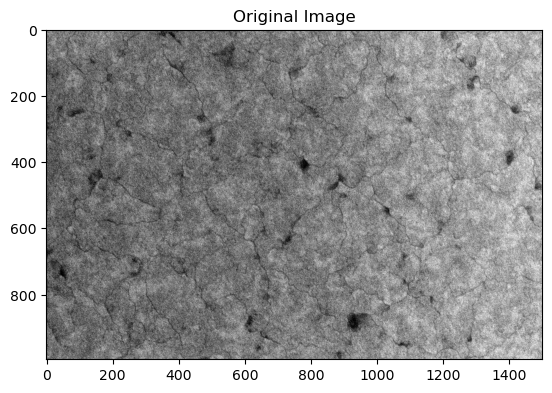

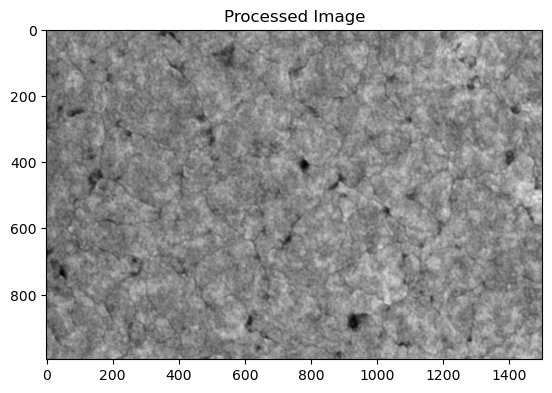

In [3]:
# Load and preprocess image
test_image = io.imread(test_image_path)

# Convert to grayscale if necessary
if len(test_image.shape) > 2:
    image = color.rgb2gray(test_image)
print(f"Original image shape: {test_image.shape}")

# display the image
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')

# preprocess the image same as training image
from skimage.morphology import disk, white_tophat
selem = disk(50)  # Size controls how large of background variations to remove
test_image = white_tophat(test_image, selem)
image_enhanced = exposure.rescale_intensity(test_image)
image_denoised = filters.gaussian(image_enhanced, sigma=2)

# Display the processed image
image_processed = image_denoised
plt.figure()
plt.imshow(image_processed, cmap='gray')
plt.title('Processed Image')

# Set scale factor, measured using imageJ
SCALE_FACTOR = 0.603 # pixel/nm

# skimage feature extraction
features = feature.multiscale_basic_features(
    image=image_processed,
    intensity=True,
    texture=True,
    edges=True,
    sigma_min=1,
    sigma_max=10,
    channel_axis=None # no color channel
)
print(f"Feature shape: {features.shape}")

In [4]:


from joblib import load
# load the classifier
pixel_classifier = load('best_pixel_classifier.joblib')
# predict the labels
X = features.reshape(-1, features.shape[2])
predicted_labels = pixel_classifier.predict(X).reshape(image_processed.shape)


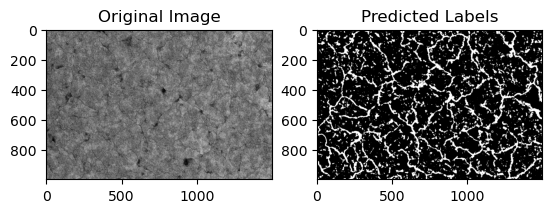

In [5]:

# Display the predicted labels with original test image, sub plot
plt.figure()
plt.subplot(121)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(predicted_labels, cmap='gray')
plt.title('Predicted Labels')
plt.show()




In [6]:
# save the predicted labels
io.imsave('predict_GBs.tif', predicted_labels.astype(np.uint8))


/var/folders/8l/1b_xxqxn54qc20gs2w8mkxxw0000gn/T/ipykernel_43874/2178937718.py:2: UserWarning: predict_GBs.tif is a low contrast image
  io.imsave('predict_GBs.tif', predicted_labels.astype(np.uint8))
